<a href="https://colab.research.google.com/github/doricardo/ibovespa-analysis/blob/master/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy -U

     |████████████████████████████████| 4.4MB 5.8MB/s 
     |████████████████████████████████| 245kB 43.8MB/s 
     |████████████████████████████████| 5.5MB 37.6MB/s 
     |████████████████████████████████| 512kB 43.7MB/s 
  Created wheel for investpy: filename=investpy-1.0-cp36-none-any.whl size=4465842 sha256=8c399460e96517e41b72a23834f16af406acd609b7272292f37bd8ba483bfa90
  Stored in directory: /root/.cache/pip/wheels/ed/a0/ec/5866604d61abe747911c1ecafeea8ac27b5b17670e1191782a
Successfully built investpy
ERROR: convertdate 2.2.0 has requirement pytz<2020,>=2014.10, but you'll have pytz 2020.5 which is incompatible.
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import datetime
import math
import investpy as inv

today = datetime.date.today()
today

datetime.date(2021, 1, 14)

In [ ]:
def make_stock_graph(stock):
    df = inv.get_stock_historical_data(stock=stock, country='brazil',
                                        from_date='01/01/2019',
                                        to_date='{}/{}/{}'.format(today.day,today.month,today.year) )
    fig = px.line(df, 
                  x=df.index, 
                  y=["Open","Close"],
                  line_shape="spline",
                  labels={"value": "",
                  "Date": ""},
                  title=stock )
    fig.update_traces(mode='markers+lines')
    #fig.show()
    fig.write_html(os.path.join(save_path, '{}.html'.format(stock)))

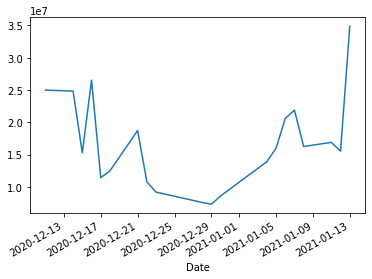

In [ ]:
df = inv.get_stock_historical_data(stock='BBAS3', 
                                   country='brazil',
                                   from_date='01/01/2017',
                                   to_date='{}/{}/{}'.format(today.day, today.month, today.year) )
df.tail(20).Volume.plot()

In [ ]:
inv.get_stock_company_profile(stock='BBAS3 ', country='brazil', language='english')

{'desc': "Banco do Brasil SA is a Brazil-based financial institution (the Bank) primarily engaged in the banking sector. The Bank's activities are divided into five business segments: Banking, which offers deposits, loans and other banking services in the retail, corporate, wholesale and public sectors; Investments, which focuses on the structuring and distribution of debt and equity instruments in Brazilian primary and secondary capital markets; Fund management, which is mainly responsible for the purchase, sale and custody of securities, as well as portfolio management; Insurance, which provides products and services related to life, property and automobile insurance, private pension and capitalization plans, and Electronic payments, which includes services related to administration of credit and debit cards, such as capture, transmission, processing and financial settlement. The Bank operates through numerous subsidiaries in the domestic and international market.",
 'url': 'https://

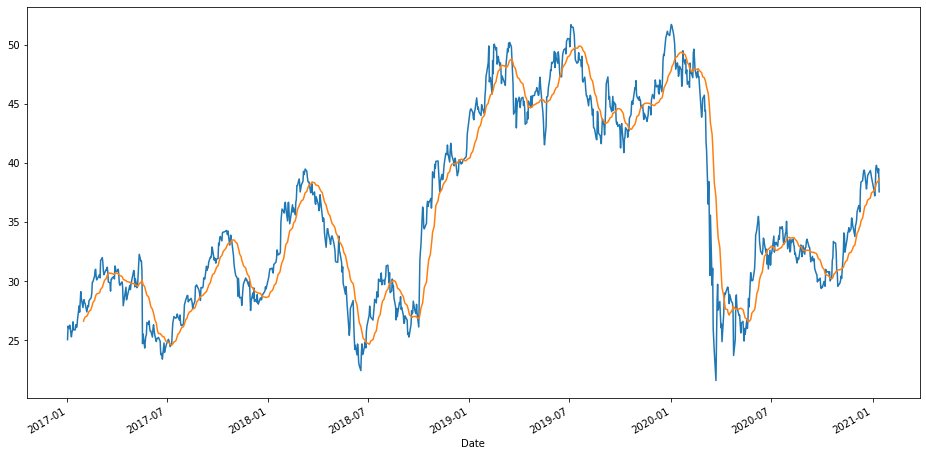

In [ ]:
df.Close.plot()
df.Close.rolling(21).mean().plot(figsize=(16,8));

In [ ]:
total = df.count().Open
split = round((df.count().Open * 0.3))
total, split

(996, 299)

In [ ]:
df_train = df[0:split]
df_test = df[split:total]

In [ ]:
df_train.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-03-14,38.91,38.99,38.02,38.44,14923400,BRL
2018-03-15,38.18,38.40,37.73,38.36,8744700,BRL
2018-03-16,38.46,38.75,38.09,38.37,23426600,BRL
2018-03-19,38.19,38.31,37.40,37.47,10439000,BRL
2018-03-20,37.73,37.85,37.17,37.61,5975000,BRL


In [ ]:
df_test.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-03-21,37.58,38.28,37.36,38.24,12071400,BRL
2018-03-22,37.91,38.49,37.23,37.55,7847100,BRL
2018-03-23,37.21,37.92,36.89,37.29,8919200,BRL
2018-03-26,37.82,37.92,37.27,37.54,4081800,BRL
2018-03-27,37.75,37.78,36.25,36.61,11304300,BRL


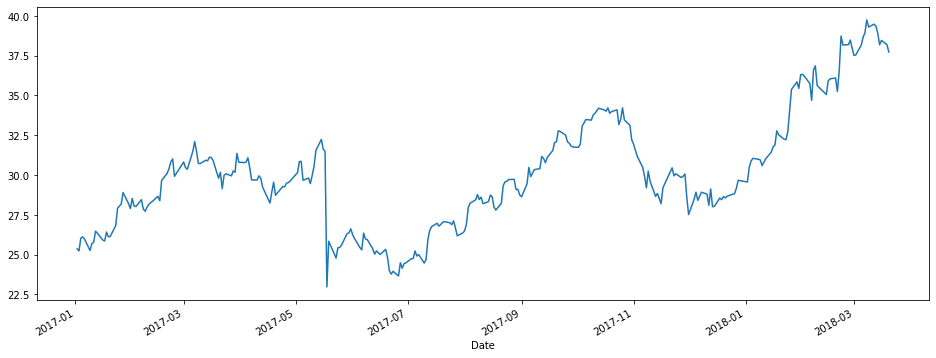

In [ ]:
df_train['Open'].plot(figsize=(16,6));

In [ ]:
df_train.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN
2017-01-10,25.667143,26.040000,25.487143,25.768571,6.255814e+06
2017-01-11,25.725714,26.108571,25.511429,25.891429,6.786671e+06
2017-01-12,25.902857,26.198571,25.670000,25.942857,7.056129e+06


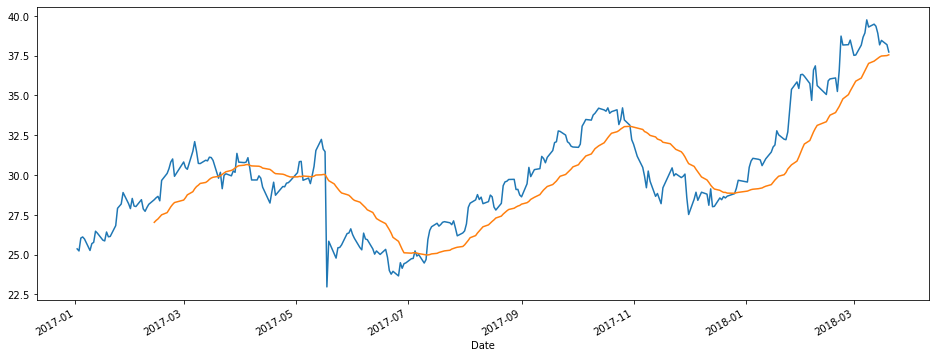

In [ ]:
df_train['Open'].plot(figsize=(16,6))
df_train.rolling(window=30).mean()['Close'].plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


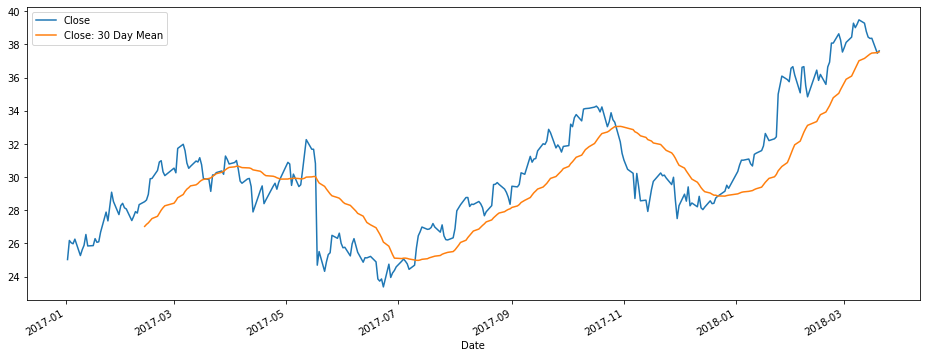

In [ ]:
df_train['Close: 30 Day Mean'] = df_train['Close'].rolling(window=30).mean()
df_train[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

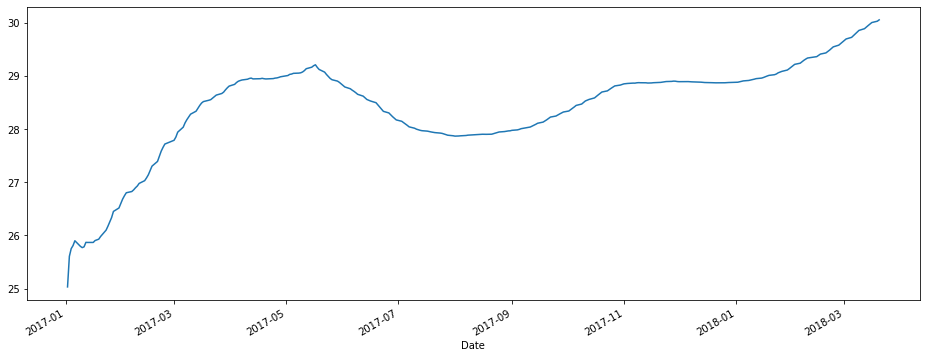

In [ ]:
# Optional specify a minimum number of periods
df_train['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, split):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
8/8 [==============================] - 8s 117ms/step - loss: 0.0571
Epoch 2/100
8/8 [==============================] - 1s 118ms/step - loss: 0.0118
Epoch 3/100
8/8 [==============================] - 1s 116ms/step - loss: 0.0108
Epoch 4/100
8/8 [==============================] - 1s 113ms/step - loss: 0.0086
Epoch 5/100
8/8 [==============================] - 1s 113ms/step - loss: 0.0088
Epoch 6/100
8/8 [==============================] - 1s 115ms/step - loss: 0.0065
Epoch 7/100
8/8 [==============================] - 1s 113ms/step - loss: 0.0063
Epoch 8/100
8/8 [==============================] - 1s 117ms/step - loss: 0.0061
Epoch 9/100
8/8 [==============================] - 1s 114ms/step - loss: 0.0045
Epoch 10/100
8/8 [==============================] - 1s 120ms/step - loss: 0.0041
Epoch 11/100
8/8 [==============================] - 1s 112ms/step - loss: 0.0039
Epoch 12/100
8/8 [==============================] - 1s 114ms/step - loss: 0.0047
Epoch 13/100
8/8 [===================

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
# dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
dataset_test = df_test

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-03-21,37.58,38.28,37.36,38.24,12071400,BRL
2018-03-22,37.91,38.49,37.23,37.55,7847100,BRL
2018-03-23,37.21,37.92,36.89,37.29,8919200,BRL
2018-03-26,37.82,37.92,37.27,37.54,4081800,BRL
2018-03-27,37.75,37.78,36.25,36.61,11304300,BRL


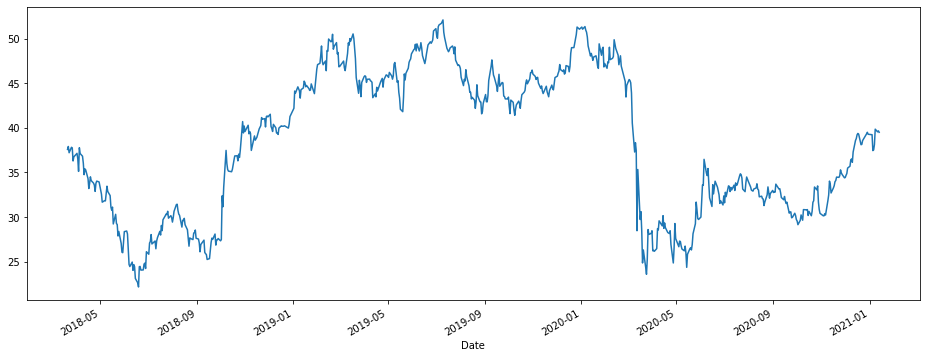

In [ ]:
df_test['Open'].plot(figsize=(16,6));

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 697 entries, 2018-03-21 to 2021-01-13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      697 non-null    float64
 1   High      697 non-null    float64
 2   Low       697 non-null    float64
 3   Close     697 non-null    float64
 4   Volume    697 non-null    int64  
 5   Currency  697 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 38.1+ KB


In [ ]:
dataset_test['Volume'] = dataset_test['Volume'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 697 entries, 2018-03-21 to 2021-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    697 non-null    float64
dtypes: float64(1)
memory usage: 10.9 KB


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


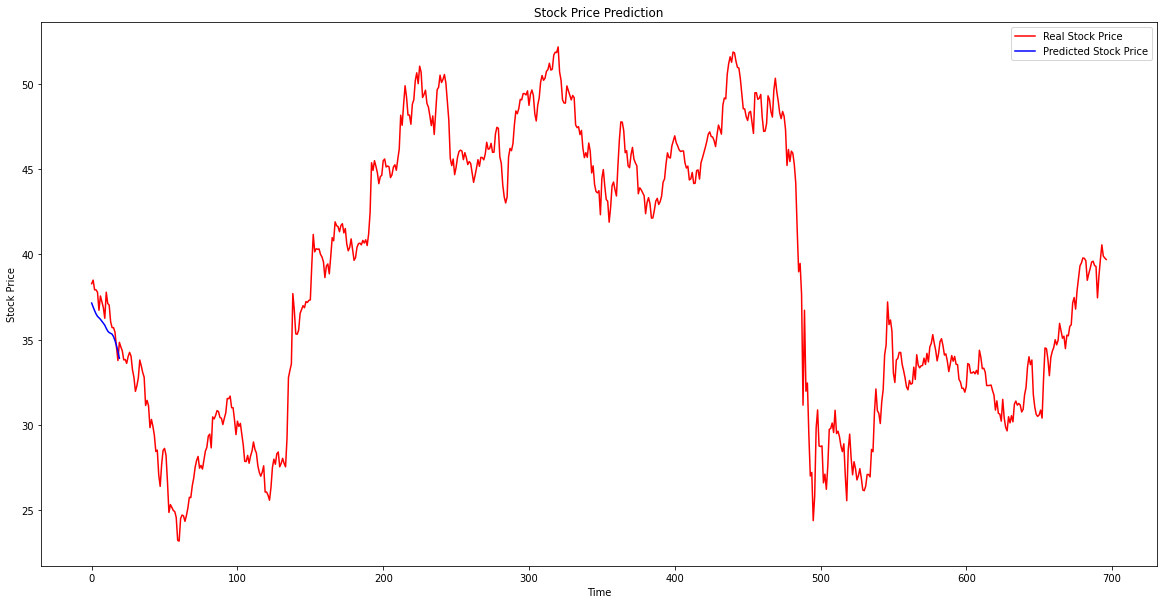

In [ ]:
# Visualising the results
fig = plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show(fig)

In [ ]:
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-01-02,25.36,25.42,24.94,25.03,1968200,BRL
2017-01-03,25.23,26.18,25.23,26.18,7578900,BRL
2017-01-04,26.04,26.36,25.95,26.04,4156300,BRL
2017-01-05,26.11,26.27,25.84,25.98,5457100,BRL
2017-01-06,25.98,26.30,25.94,26.26,3692400,BRL
...,...,...,...,...,...,...
2021-01-07,38.12,39.70,37.92,39.56,21878700,BRL
2021-01-08,39.85,40.56,39.29,39.79,16236900,BRL
2021-01-11,39.55,39.90,38.80,39.14,16880400,BRL


In [ ]:
stock = 'BBAS3'
def make_stock_graph(stock):
    df = inv.get_stock_historical_data(stock=stock, country='brazil',
                                        from_date='01/01/2019',
                                        to_date='{}/{}/{}'.format(today.day,today.month,today.year) )
    fig = px.line(df, 
                  x=df.index, 
                  y=["Open","Close"],
                  line_shape="spline",
                  labels={"value": "",
                  "Date": ""},
                  title=stock )
    fig.update_traces(mode='markers+lines')
    #fig.show()
    fig.write_html(os.path.join(save_path, '{}.html'.format(stock)))

In [ ]:
make_stock_graph(stock)

ValueError: ignored